## 1 Этап. Загрузка данных. Общая проверка информации.

In [1]:
import pandas as pd

churn_data = pd.read_csv('churn.csv',  sep=',')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn_data.info() #общая информация (количество строк и колонок, тип данных, есть ли незаполненные ячейки)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2 Этап. Обработка данных.
- Создаем копию таблицы, чтобы при раюоте с данными была возможность восстановить случайно удаленную информацию.
- Удаляем лишние колонки (RowNumber, так же можно удалить колонку Surname, т.к это личная информация и для статистических выводов и построения графиков она не нужна).
- Проверяем информацию, например, по возратсту клиента (есть ли клиенты с возрастом, который может указывать на неточность данных, например, меньше 18 и больше 100 ) и везде ли указан пол клиента.

In [3]:
churn_data_df = churn_data.copy() #создаем копию
churn_data_df = churn_data_df.drop(['RowNumber', 'Surname'], axis=1) #удаляем колонки 
churn_data_df.head() #проверяем результат

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
churn_data_df['Age'].max() #максимальный возраст клиента соответствует реальности

92

In [5]:
churn_data_df['Age'].min() #минимальный возраст клиента соответствует реальности

18

In [6]:
churn_data_df['Gender'].value_counts() #все колонки заполнены пол клиента делится только на Male и Female

Male      5457
Female    4543
Name: Gender, dtype: int64

In [7]:
churn_data_df['Tenure'].value_counts() #справочно представлен срез клиентов обслуживающихся до 10 лет

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

## 3 Этап. Выполнение заданий.

**1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.**
___________________________________________________________________________________________________________________________________

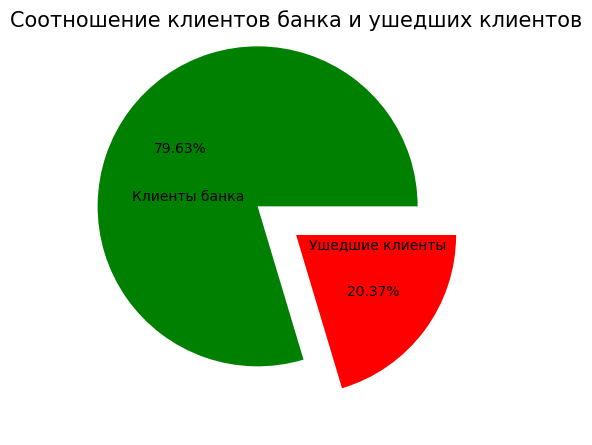

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(4,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    churn_data_df['Exited'].value_counts(),
    labels=['Клиенты банка', 'Ушедшие клиенты'],
    autopct='%.2f%%',
    labeldistance = 0.1,
    colors=['green', 'red'],
    
    explode = [0.3, 0]
);
axes.set_title('Соотношение клиентов банка и ушедших клиентов', fontsize=15);

- На графике показано соотношение ушедших клиентов т.е закрывших счет и клиентов продолжающих обслуживаться в банке за определенное количество времени. По данным из интернета нормальный отток клиентов (Churn Rate)* для малых и средних компаний составляет 3-5%, для крупных 1%, т.е показатель 20.37% является высоким. 
- Из графика нельзя сделать вывод являются ли оставшиеся клиенты лояльными, т.к мы не знаем как давно они открыли счет, могут ли рекомендовать банк знакомым, как часто пользуются новыми и дополнительными продуктами банка(страховка, кредиты, вклады) и множество других факторов, оценивающих именно лояльность клиента.
- Так же нельзя сделать вывод хороший ли это показатель для этого банка. Т.к нам не известно распределение показателя по времени. 

*источник данных https://emailsoldiers.ru/blog/churn-rate

**2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.**
______________________________________________________________________________________________________________________________________

In [24]:
filtered_by_balance = churn_data_df[churn_data_df['Balance'] > 2500]


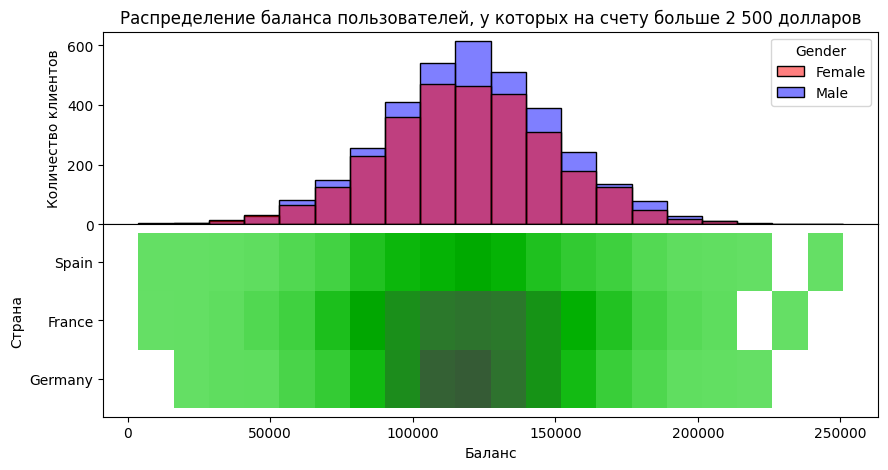

In [10]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    bins=20,
    hue='Gender',
    palette={'Female':'r', 'Male':'b'},
    ax=axes[0],     
);
plt.subplots_adjust(hspace=.0)
axes[0].set_xlabel('Баланс')
axes[0].set_ylabel('Количество клиентов')
axes[0].set_title('Распределение баланса пользователей, у которых на счету больше 2 500 долларов')
axes[1].set_xlabel('Баланс')
axes[1].set_ylabel('Страна')
sns.histplot(
    data=filtered_by_balance,
    x='Balance',
    y='Geography',
    bins=20,
    color='green',
    ax=axes[1]
);


- Клиентов мужчин больше, чем женщин.
- Основная масса вкладчиков держат на счетах от 95 до 145 тыс. долларов.
- По интенсивности цвета можно увидеть как распределяются клиенты банка по суммам и странам. Например, в Испании вкладчики распределяются более равномерно, в Германии большее количество вкладчиков с суммами 105 тыс. до 130 тыс. (график показывает только распределение сумм, по нему нельзя увидеть количество клиентов с разбивкой по старнам)

**3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.**
___________________________________________________________________________________________

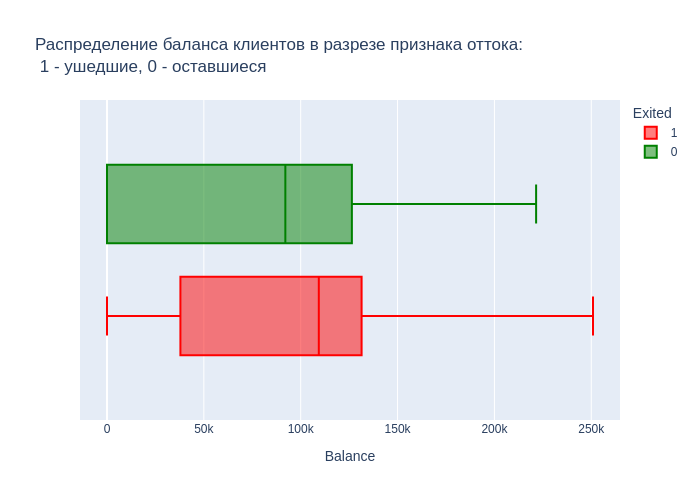

In [58]:
import plotly
import plotly.express as px 

fig = px.box(
    data_frame =churn_data_df,
    x='Balance', 
    color='Exited',
    height=500, 
    width=700, 
    title='Распределение баланса клиентов в разрезе признака оттока: <br> 1 - ушедшие, 0 - оставшиеся', 
    color_discrete_sequence=['red','green']
)
fig.show('png')

- 0 - клиент банка, 1 - ушедший клиент
- Из графика видно, что разброс сумм на счетах у клиентов банка(0) больше чем у ушедших клиентов(1). Возможно, это связано с тем, что банк фиксировал поcледнюю сумму, перед закрытием счета. Т.е у клиента была какая-то сумма, он ее забирал и уходил из банка. Поэтому у ушедших клиентов почти нет нулевых балансов.
- Ушедшие клиенты хранили на счетах бОльшие суммы.
- Так же сдвинут медианный баланс. Это может говорить о том, что ушедшие клиенты хранили на счетах вклады, а оставшиеся клиенты больше пользуются зарплатными проектами и хранят на счетах суммы для повседневных нужд. 
- Обобщая, можно предположить, что банк предлагал какой-то интересный продукт, например, вклад под высокий процент, но для этого на счету должен был быть депозит не менее определенной суммы (например, от 40 тыс.). Как только акция закончилась, часть клиентов просто закрыли счета и забрали эти лимиты, а часть клиентов просто обнулили балансы, но не закрыли счет, ожидая, что банк предложит еще какой-то интересный продукт.

**4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?**
________________________________________________________________________________________________________________________________________

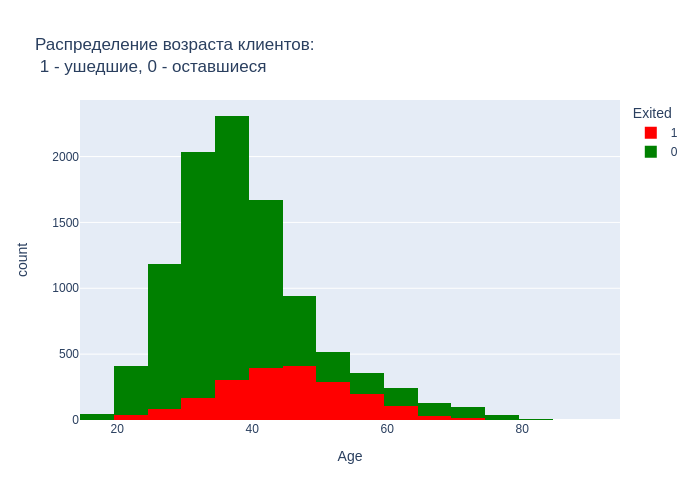

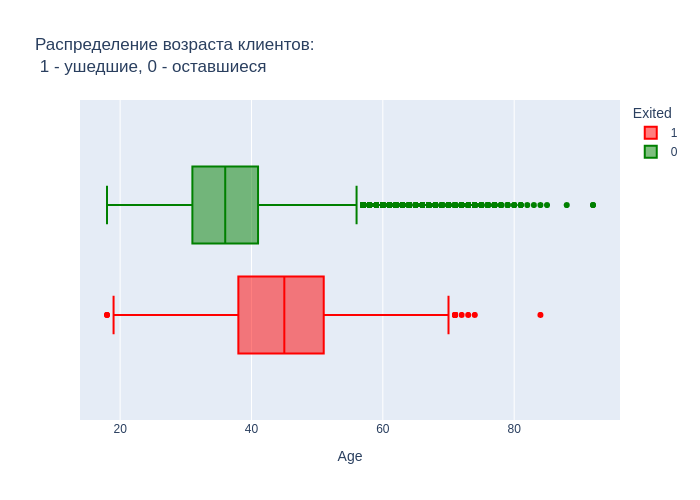

In [59]:
import plotly
import plotly.express as px

fig1 = px.histogram(
    data_frame =churn_data_df, 
    x='Age', 
    color='Exited',
    height=500, 
    width=700, 
    histfunc='count',
    title='Распределение возраста клиентов: <br> 1 - ушедшие, 0 - оставшиеся', 
    nbins = 25,
    color_discrete_sequence=['red','green'],
    
)
fig1.show('png')

import plotly
import plotly.express as px 

fig2 = px.box(
    data_frame =churn_data_df,
    x='Age', 
    color='Exited',
    height=500, 
    width=700, 
    title='Распределение возраста клиентов: <br> 1 - ушедшие, 0 - оставшиеся', 
    color_discrete_sequence=['red','green']
)
fig2.show('png')

- Основная группа ушедших клиентов - это люди в возрасте от 38 до 51 года. Это социально - активная группа, в этом возрасте люди уже работают, часто имеют семью, недвижимость и предпочтения. Конечно банку стоит обратить на это внимание и разработать программу лояльности или интересное предложение рассчитанное на удержание этой группы. Т.к люди из этой группы скорее всего имеют больший и стабильный заработок.
- Кроме того очень сильно смещен медианный возраст клиентов. Медианный возраст оставшихся клиентов 36 ушедших 45. Возможно, это связано с зарплатными проектами банка, клиенты, которые зависят от работадателя остаются клиентами банка. Люди которые могут выбирать уходят.

**5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.**
___________________________________________________________________________________________________________________

,CreditScore,Exited,EstimatedSalary
0,350,1,125823.790
1,351,1,169621.690
2,358,1,141959.110
3,359,1,146955.710
4,363,1,100615.140
...,...,...,...
857,848,0,158853.980
858,849,0,132742.870
859,849,1,170130.080
860,850,0,96140.465


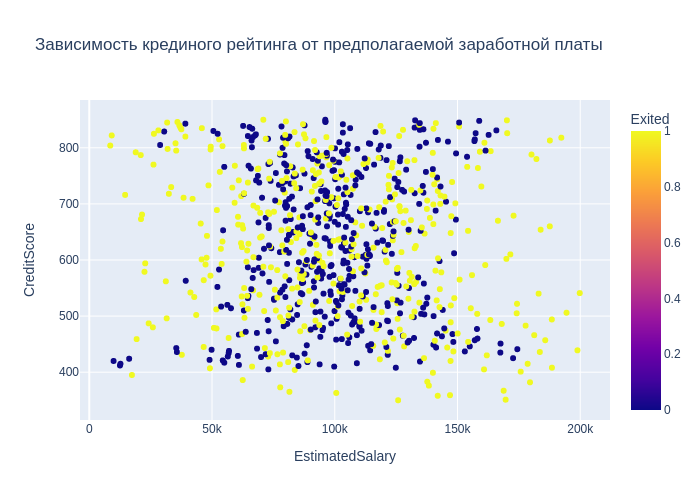

In [60]:
salary_score_data = churn_data_df.groupby(['CreditScore', 'Exited'], as_index=False)['EstimatedSalary'].median()
display(salary_score_data)
fig = px.scatter(
    data_frame = salary_score_data,
    x = 'EstimatedSalary',
    y='CreditScore',
    color='Exited',
    height=500,
    width=700,
    title='Зависимость крединого рейтинга от предполагаемой заработной платы'
)
fig.show('png')

- Желтыми точками обозначены ушедшие клиенты, синими - рабочие.
- На графике видно что кредитный рейтинг и предполагаемая зарплата не связаны. Разброс очень большой.
- Так же мы видим, что клиенты несмотря на высокие зарплаты имеют низкий кредитный рейтинг и покинули банк. Возможно, это связано с тем, что банк автоматически присваивает низкий кредитный рейтинг(обнуляет), людям, которые закрыли счета и уже не являются клиентами банка. 
- Статистика банка некорректная и требует дополнительного исследования. 

**6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.**
_____________________________________________________________

In [14]:
gender_exited = churn_data_df.groupby('Gender', as_index=False)['Exited'].sum()
display(gender_exited)

,Gender,Exited
0,Female,1139
1,Male,898


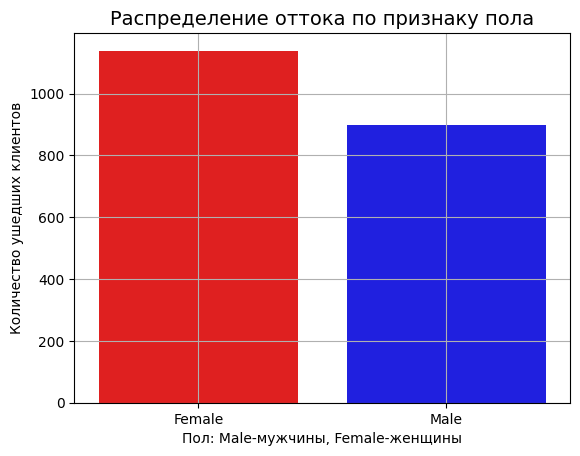

In [15]:
barplot= sns.barplot(x="Gender", y="Exited", orient='v',data=gender_exited, palette={'Female':'r', 'Male':'b'})
barplot.set_title('Распределение оттока по признаку пола', fontsize=14);
barplot.set_xlabel('Пол: Male-мужчины, Female-женщины');
barplot.set_ylabel('Количество ушедших клиентов');
barplot.grid()


- Чаще уходят женщины. Несмотря на то, что женщин-клиентов банка меньше чем мужчин, отток женщин выше. Это говорит о непродумманой программе лояльности для женщин. Кэшбэки, кредитные линии с удобным графииком погашения, все это могло бы быть стимулом для женщин остаться в банке. 

**7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграму.**
______________________________________________

In [16]:
num_of_products_exited = churn_data_df.groupby('NumOfProducts', as_index=False)['Exited'].value_counts() 
display(num_of_products_exited)

,NumOfProducts,Exited,count
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,1,220
5,3,0,46
6,4,1,60


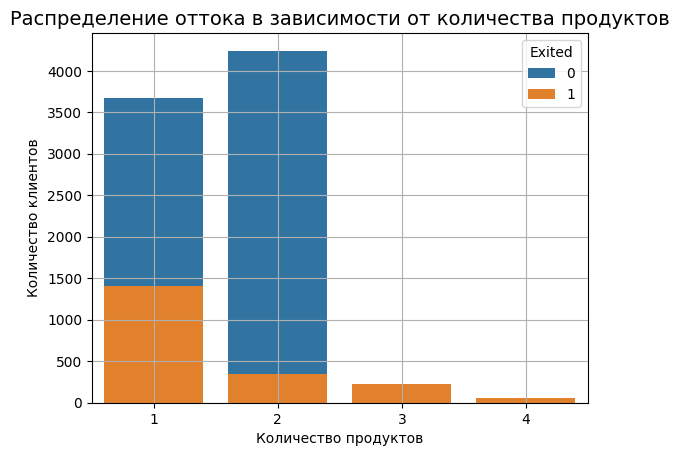

In [17]:
barplot = sns.barplot(
    data=num_of_products_exited,
    x='NumOfProducts',
    y='count',
    hue='Exited',
    orient='v',
    dodge=False
);
barplot.set_title('Распределение оттока в зависимости от количества продуктов', fontsize=14);
barplot.set_xlabel('Количество продуктов');
barplot.set_ylabel('Количество клиентов');
barplot.grid()


- Основной отток клиентов с одним продуктом. Это подтверждает теорию, что банк предлагал интересную программу, а после ее окончания клиенты перестали пользоваться услугами банка.
- Так же видно, что основная массы оставшихся клиентов пользуются только двумя продуктами банка. 
- То, что клиенты с двумя и тремя продуктами покинули банк, говорит либо о непопулярности этих продуктов, либо о том, что программы свернули, и ничем больше клиентов не заинтересовали.

**8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?**
_______________________________________________________________

In [18]:
active_clients = churn_data_df.groupby('IsActiveMember', as_index=False)['Exited'].value_counts() 
display(active_clients)

,IsActiveMember,Exited,count
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


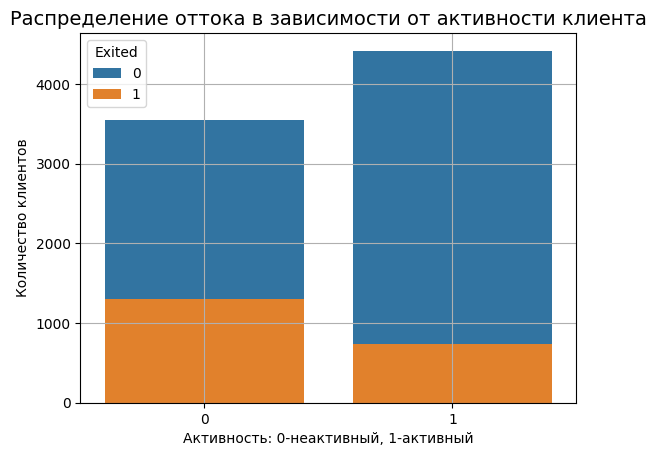

In [19]:
barplot = sns.barplot(
    data=active_clients,
    x='IsActiveMember',
    y='count',
    hue='Exited',
    orient='v',
    dodge=False
);
barplot.set_title('Распределение оттока в зависимости от активности клиента', fontsize=14);
barplot.set_xlabel('Активность: 0-неактивный, 1-активный');
barplot.set_ylabel('Количество клиентов');
barplot.grid()

- Среди активных клиентов отток ниже в два раза.
- Для детального анализа мало данных. Т.к непонятно какого клиента банк считает активным, а какого неактивным. Например, клиент с ID 15619304 обслуживался в банке 8 лет, пользовался тремя продуктами, хранил на счету более 100 тыс., имел средний кредитный рейтинг - считается неактивным. 
- Нужна дополнительная информация от банка, например, если активность расчитывается по движению денег на счету, или по внутренним опросам банка. 

**9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.**
________________________________________________________________

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


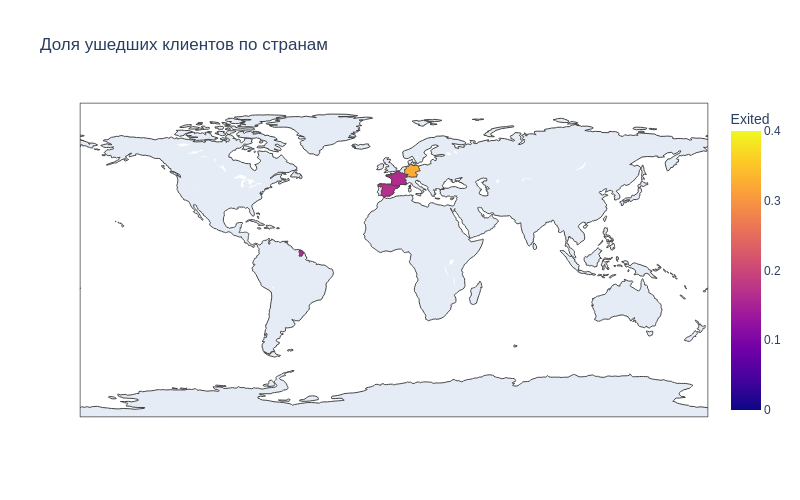

In [61]:
strana_df = churn_data_df.groupby(['Geography'], as_index=False)['Exited'].mean()
display(strana_df)
fig = px.choropleth(
    data_frame=strana_df, 
    locations='Geography', 
    locationmode = "country names", 
    color="Exited", 
    hover_name='Geography',
    range_color=[0, 0.4], 
    title='Доля ушедших клиентов по странам',
    width=800, 
    height=500, 
    color_continuous_scale=px.colors.sequential.Plasma 
)

#отображаем график
fig.show('png')

In [21]:
churn_data_df.groupby(['Geography'], as_index=False)['Exited'].value_counts() #справочно соотношение количествa клиентов 

,Geography,Exited,count
0,France,0,4204
1,France,1,810
2,Germany,0,1695
3,Germany,1,814
4,Spain,0,2064
5,Spain,1,413


- Доля ушедших клиентов выше в Германии, что подтвержено оранжевым цветом, в соответствии с палитрой цветов справой стороны карты.
- Во Франции и Испании отток примерно одинаковый.
- Возможно, это связано с географией расположения банка. Скорее всего это французский банк, т.к основаная часть клиентов находится во Франции. И в какой-то момент клиентам из Германии стало неудобно в нем обслуживаться. 

**10. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.**
_______________________________________________________

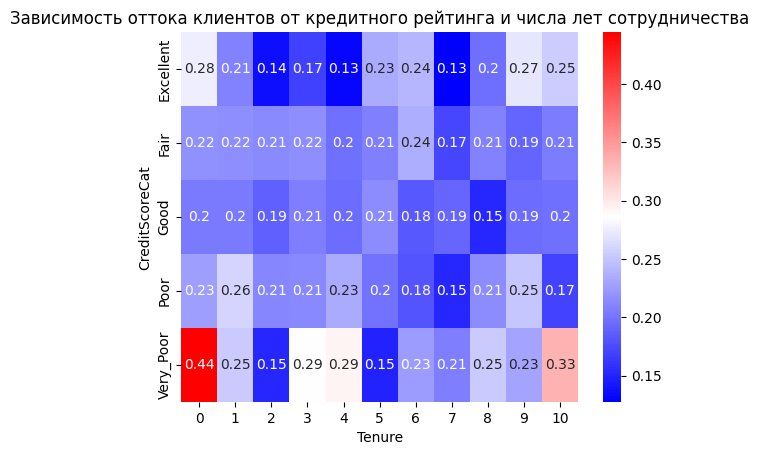

In [47]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 851:
        return "Top"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score < 300:
        return "Deep"

churn_data_df['CreditScoreCat'] = churn_data_df['CreditScore'].apply(get_credit_score_cat)
pivot_heat = churn_data_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure'
)
fig = plt.figure()
ax = sns.heatmap(data=pivot_heat,  annot=True, fmt='.2g', cmap= 'bwr');
ax.set_title('Зависимость оттока клиентов от кредитного рейтинга и числа лет сотрудничества');

- Синим цветом показаны категории категории клиентов, где отток меньше всего.
- На розовые и красные категории банку нужно обратить внимание. Из графика видно, что есть группа клиентов, которая прекращает работу с банком практически сразу после начала работы с ним.
- Так же мы видим, что у клиентов с низким кредитным рейтингом отток больше, т.к в нижней части графика самая светлая полоса, переходящая в розовый. Но поскольку, в низкий рейтинг попадает довольно большая группа, которая обслуживалась 10 лет, могу предположить, что при закрытии счета, банк просто обнуляет кредитный рейтинг. 